## Prediction on Wine Quality

Introduction: This project aims to predict the wine quality based on the wine features.

Dataset: White Wine Quality from Kaggle

Objectives:
- Classify wines into target categories (good/poor)
- Train with machine learning models: KNN, SVM, LDA
- Tune the hyperparameters using cross-validation- Evaluate models with metrics: Accuracy, Precision, Recall, F1-Score
- Compare their performance

Skills:
- Python: pandas, sklearn, matplotlib
- Machine Learning: models' concepts, evaluation methods

## 1. Data Processing
## Load the dataset.

In [1]:
# Import the dataset

import pandas as pd
df = pd.read_csv('winequality-white.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Handle any missing values (if present).

In [2]:
# Check any missing value by each column

print('Number of missing values of each column: ')
df.isnull().sum()

Number of missing values of each column: 


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
# Confirm no missing value in total

print('Number of missing values in total: ')
df.isnull().sum().sum()

Number of missing values in total: 


0

In [4]:
# Separate data set into features and target

X = df.drop(columns = ['quality'])    # feature columns are all columns except quality
y = df['quality']    # target column is quality

## Convert the target variable into a binary classification problem where: 
## Quality 6 and above is labelled as 1 (good quality). Quality below 6 is labelled as 0 (poor quality).

In [5]:
# Display the quality column

y.head(20)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    5
11    5
12    5
13    7
14    5
15    7
16    6
17    8
18    6
19    5
Name: quality, dtype: int64

In [6]:
# Convert quality column's value to be 0 if it is <6 and to be 1 if it is >=6

y = y.apply(lambda x: 1 if x >= 6 else 0)
y.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    0
Name: quality, dtype: int64

## 2. Train-Test Split:
## Split the dataset into 70% training and 30% testing subsets, and normalise the feature columns.

In [7]:
# Check the dataset original size

df.shape

(4898, 12)

In [8]:
# Split 70% of data to be training set and 30% to be testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42, stratify = y, shuffle = True)

In [9]:
# Normalize the feature columns by min max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train: {X_train.shape}')
print(X_train)
print(f'X_test: {X_test.shape}')
print(X_test)
print(f'y_train: {y_train.shape}')
print(y_train)
print(f'y_test: {y_test.shape}')
print(y_test)

# Sum the row number of train & test sets are equal to the row number of original data set
# And checked training set row number is 70% of the original one

X_train: (3428, 11)
[[0.30769231 0.16666667 0.3373494  ... 0.46363636 0.36046512 0.48387097]
 [0.27884615 0.15686275 0.19277108 ... 0.56363636 0.15116279 0.74193548]
 [0.19230769 0.04901961 0.13253012 ... 0.54545455 0.23255814 0.59677419]
 ...
 [0.14423077 0.2254902  0.22891566 ... 0.56363636 0.27906977 0.59677419]
 [0.27884615 0.12745098 0.19277108 ... 0.60909091 0.27906977 0.27419355]
 [0.25       0.19607843 0.10240964 ... 0.45454545 0.27906977 0.22580645]]
X_test: (1470, 11)
[[0.36538462 0.21568627 0.22891566 ... 0.40909091 0.5        0.48387097]
 [0.22115385 0.19607843 0.1626506  ... 0.4        0.23255814 0.72580645]
 [0.46153846 0.11764706 0.25301205 ... 0.35454545 0.31395349 0.5483871 ]
 ...
 [0.08653846 0.06372549 0.1746988  ... 0.94545455 0.31395349 0.53225806]
 [0.24038462 0.11764706 0.15662651 ... 0.73636364 0.39534884 0.4516129 ]
 [0.26923077 0.30392157 0.22891566 ... 0.52727273 0.40697674 0.22580645]]
y_train: (3428,)
2010    1
3850    1
4519    1
1031    1
1960    0
      

## 3.Model Implementation:
## Train three models: k-Nearest Neighbours (k-NN), Support Vector Machine(SVM), and Linear Discriminant Analysis (LDA) using the training dataset.

In [10]:
# Train with knn model which k value = 3

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

# Find the prediction result

y_pred_knn = knn.predict(X_test)

In [11]:
# Train with svm model which default kernel is rbf

from sklearn.svm import SVC
svm = SVC() 
svm.fit(X_train, y_train)

# Find the prediction result

y_pred_svm = svm.predict(X_test)

In [12]:
# Train with lda model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(shrinkage = None) 
lda.fit(X_train, y_train)

# Find the prediction result

y_pred_lda = lda.predict(X_test)

## Tune the hyperparameters:
## For k-NN: Select the optimal number of neighbours (k) using cross-validation.

In [13]:
# Loop to find the best value for k using cross validation

from sklearn.model_selection import cross_val_score
import numpy as np

k_values = [i for i in range (1,31)]
scores_knn = []
for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors = k)
    score_knn = cross_val_score(knn_cv, X_train, y_train, cv = 5)
    scores_knn.append(np.mean(score_knn))

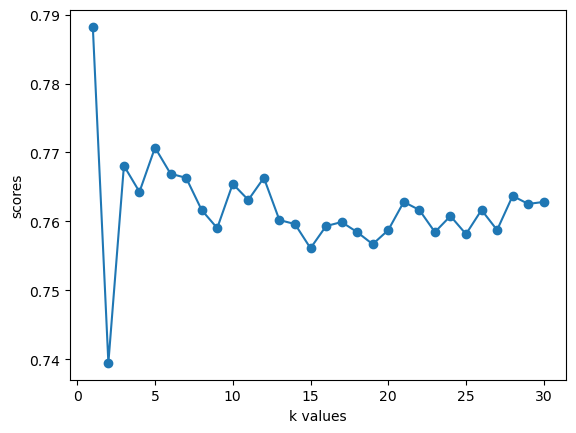

In [14]:
# Plot the graph to see k value with cross validation score

import matplotlib.pyplot as plt
plt.plot(k_values, scores_knn, marker = 'o')
plt.xlabel('k values')
plt.ylabel('scores')
plt.show()

In [15]:
# From the graph we can see k = 1 with the highest score, but it is probably overfitting

best_index = np.argmax(scores_knn[1:]) + 1   # Skip index 0 which is k=1
best_k = k_values[best_index]
print(best_k)

5


In [16]:
# Train again with the best k

knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train, y_train)

# Find the prediction result

y_pred_knn = knn.predict(X_test)

## For SVM: Experiment with different kernel functions (linear, polynomial, RBF) and select the best kernel using cross-validation.

In [17]:
# Use cross validation for linear function to find the mean score

svm_linear = SVC(kernel = 'linear')
scores_svm_linear = cross_val_score(svm_linear, X_train, y_train, cv = 5)
print('Mean Scores of Linear:', np.mean(scores_svm_linear))

Mean Scores of Linear: 0.7540797173926922


In [18]:
# Use cross validation for polynomial function to find the mean score

svm_poly = SVC(kernel = 'poly')
scores_svm_poly = cross_val_score(svm_poly, X_train, y_train, cv = 5)
print('Mean Scores of Poly:', np.mean(scores_svm_poly))

Mean Scores of Poly: 0.7742086782575386


In [19]:
# Use cross validation for RBF function to find the mean score

svm_rbf = SVC(kernel = 'rbf')
scores_svm_rbf = cross_val_score(svm_rbf, X_train, y_train, cv = 5)
print('Mean Scores of RBF:', np.mean(scores_svm_rbf))

Mean Scores of RBF: 0.7744989466067971


In [20]:
# Comparing the mean cross validation scores, RBF is the best kernel
# Train again with the best kernel: RBF

from sklearn.svm import SVC
svm = SVC(kernel = 'rbf') 
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## 4. Evaluation:
## Evaluate all models on the test set using the following metrics: Accuracy, Precision, Recall, F1-Score. Generate and display a confusion matrix for each model.

In [21]:
# Evaluate for knn

from sklearn import metrics

accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
precision_knn = metrics.precision_score(y_test, y_pred_knn)
recall_knn = metrics.recall_score(y_test, y_pred_knn)
f1_knn = metrics.f1_score(y_test, y_pred_knn)

print('KNN Evaluation:')
print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1-Score:', f1_knn)

KNN Evaluation:
Accuracy: 0.7625850340136054
Precision: 0.8080313418217434
Recall: 0.843558282208589
F1-Score: 0.8254127063531765


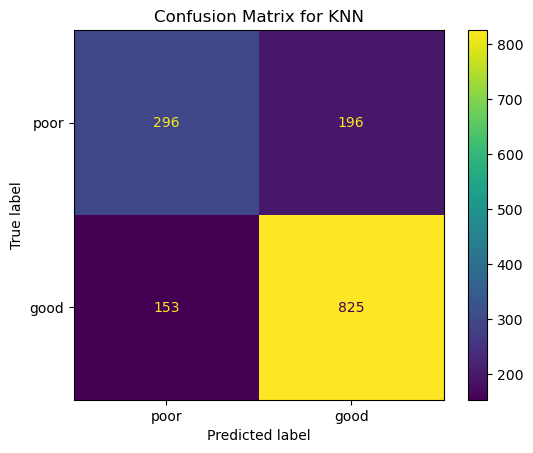

In [22]:
# Generate and display confusion matrix for knn

cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)
cm_knn_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = ['poor', 'good'])
cm_knn_display.plot()
plt.title('Confusion Matrix for KNN')
plt.show()

In [23]:
# Evaluate for svm

accuracy_svm = metrics.accuracy_score(y_test, y_pred_svm)
precision_svm = metrics.precision_score(y_test, y_pred_svm)
recall_svm = metrics.recall_score(y_test, y_pred_svm)
f1_svm = metrics.f1_score(y_test, y_pred_svm)

print('SVM Evaluation:')
print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1-Score:', f1_svm)

SVM Evaluation:
Accuracy: 0.7537414965986394
Precision: 0.78
Recall: 0.8773006134969326
F1-Score: 0.8257940327237728


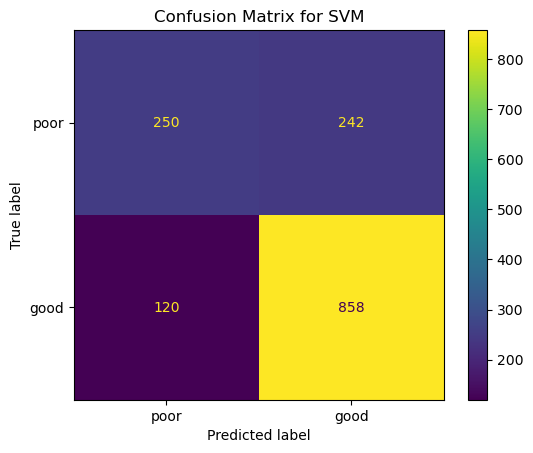

In [24]:
# Generate and display confusion matrix for svm

cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
cm_svm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = ['poor', 'good'])
cm_svm_display.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

In [25]:
# Evaluate for lda

accuracy_lda = metrics.accuracy_score(y_test, y_pred_lda)
precision_lda = metrics.precision_score(y_test, y_pred_lda)
recall_lda = metrics.recall_score(y_test, y_pred_lda)
f1_lda = metrics.f1_score(y_test, y_pred_lda)

print('LDA Evaluation:')
print('Accuracy:', accuracy_lda)
print('Precision:', precision_lda)
print('Recall:', recall_lda)
print('F1-Score:', f1_lda)

LDA Evaluation:
Accuracy: 0.7333333333333333
Precision: 0.7602131438721137
Recall: 0.8752556237218814
F1-Score: 0.8136882129277566


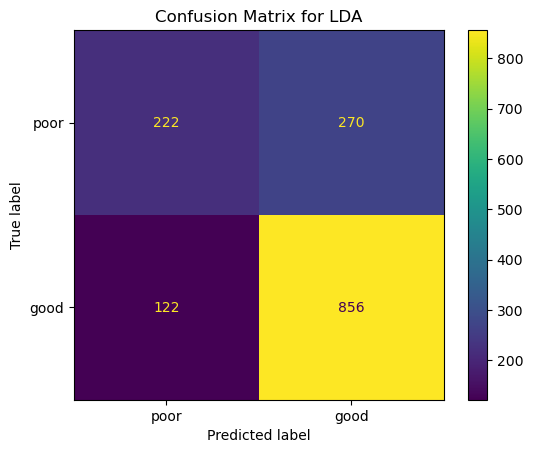

In [26]:
# Generate and display confusion matrix for lda

cm_lda = metrics.confusion_matrix(y_test, y_pred_lda)
cm_lda_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_lda, display_labels = ['poor', 'good'])
cm_lda_display.plot()
plt.title('Confusion Matrix for LDA')
plt.show()

## 5. Analysis:
## Compare the performance of the three models based on the evaluation metrics. Discuss the strengths and weaknesses of each model in the context of the dataset.

For KNN:

- The accuracy is similar to SVM
- It has the highest precision which has less FP. It implies less poor wine is classified as good wine
- At the same time, it has the lowest recall which has more FN. It means more good wine is classified as poor
- F1-score is lower than SVM

Strength:

- With high precision, KNN is a good model to make sure those defined as good quality wine is actually good

Weakness:

- It is less efficient when the dataset is not small since it needs to scan through the entire data spcae for comparing all data points

For SVM:

- The accuracy is similar to KNN
- It has high recall which has less FN which have less good wine is classified as poor
- On the other hand, it has lower precision with more FP so that more poor wine is classified as good wine
- The F1-score is the highest which means it has the greatest balance on precision and recall

Strength:

- Performance is generally good since it can keep good balance between precision and recall
- It also works well with high dimensionality

Weakness:

- The training time of SVM is relatively longer when dataset is large or kernel is complex

For LDA:

- The accuracy, precision and F1-score are the lowest
- Only recall is higher which has the least FN

Strength:

- It is relatively faster than the other 2 models

Weakness:

- It does not perform well when dataset is complex. Since this dataset is non-linear separable, LDA is not the best model

In conclusion, SVM is the most suitable model for this dataset because of the highest F1-score, which has the best trade-off between accuracy and robustness.